<a href="https://colab.research.google.com/github/AadiLogic/my_project/blob/main/Copy_of_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title - Hotel Booking Analysis**



### **Project type: EDA(Exploratory Data Analysis)**

## **Objective:**

The goal of this project is to analyze hotel booking data to gain insights that can help improve hotel management. Specifically, the project aims to:

Identify the best times to book a hotel room and the most cost-effective length of stay.

Predict the likelihood of special requests based on guest and booking characteristics.

Provide actionable insights to enhance pricing strategies and guest satisfaction.

## **Scope of the project:**

**Data Cleaning and Exploration:** Prepare and clean the dataset, ensuring it is suitable for analysis.

**Exploratory Data Analysis:** Visualize trends related to booking dates, length of stay, and guest behavior.

**Price and Stay Analysis:** Examine how stay duration impacts daily rates and find the optimal times to book.

**Prediction of Special Requests:** Build a model to predict the likelihood of special requests based on booking patterns.

**Insights and Recommendations:** Provide suggestions for improving pricing strategies, resource allocation, and guest services.

This project will deliver key findings and recommendations to help hotels optimize operations and enhance guest experiences.

**Data Preparation:**

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **Data Overview:**

In [ ]:
#Reading the first five rows with the help of head method
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Reading the last five rows with the help of tail method
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Get the number of rows and columns
rows, columns = data.shape

print(f"The total number of rows are: {rows}")
print(f"The total number of columns are: {columns}")

The total number of rows are: 119390
The total number of columns are: 32


In [ ]:
#“Let’s review our columns to better understand them and perform meaningful tasks!”
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Key Observations:**

Total entries: 119,390 rows.

Total columns: 32 columns.

**Notable Columns:**

1. children, country, agent, and company columns have some missing values.

2. The company column has a significant amount of missing data, with only 6,797 non-null values.

3. The adr column (Average Daily Rate) is a floating-point number and could be useful for price-related analysis.

4. The total_of_special_requests column will likely be important for predicting special requests.

**Next Steps:**

1. Handle Missing Data: You could decide whether to fill, drop, or further investigate missing values.

2. Data Types: Ensure all columns have the correct data types (e.g., categorical vs. numerical).

3. Exploratory Data Analysis: Start analyzing key columns like adr, lead_time, and total_of_special_requests.

In [ ]:
# Fill missing values with 0 in a numerical column
data['company'].fillna(0, inplace=True)

# Fill missing values in a categorical column with 'Unknown'
data['agent'].fillna('Unknown', inplace=True)

<ipython-input-4-9a4c5a6d9af8>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['agent'].fillna('Unknown', inplace=True)


The warning you’re encountering happens because the agent column is of type float64, and you're trying to fill it with a string ('Unknown'). Since pandas is strict about data types, you need to convert the column's type to object (which can store strings) before filling it with 'Unknown'.

Here’s how you can fix the issue:

Solution: Convert the column to object type first, then fill missing values.

In [ ]:
# Convert 'agent' column to object type
data['agent'] = data['agent'].astype('object')

# Fill missing values with 0 in a numerical column
data['company'].fillna(0, inplace=True)

# Fill missing values in a categorical column with 'Unknown'
data['agent'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing values in 'children' with the median
data['children'].fillna(data['children'].median(), inplace=True)

# Fill missing values in 'country' with 'Unknown'
data['country'].fillna('Unknown', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

It looks like all missing values have been handled, and the data is now clean and well-structured.

Here's a summary of your updated dataset:

Total Entries: 119,390 rows

Total Columns: 32 columns

**Data Types:**

Numerical Columns: int64 (16 columns), float64 (3 columns)

Categorical Columns: object (13 columns)

# **Data Cleaning:**

In [ ]:
# checking missing or nan value
data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


It looks like all missing values have been successfully handled, as the output shows 0 missing values for every column. Your dataset is now clean and free of missing data.

In [ ]:
# Identify duplicated rows
duplicates = data[data.duplicated()]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43           

**Rationale for Retaining Duplicate Data**

Context: The dataset includes hotel booking records with attributes like arrival date and hotel type, resulting in duplicate rows.

**Reasons for Keeping Duplicates:**

Accurate Trends: Multiple bookings on the same date or similar conditions are normal and provide a complete view of booking patterns.

Operational Insights: Retaining duplicates helps in understanding peak periods, demand, and customer preferences.

Data Integrity: Removing duplicates could lead to loss of valuable information, affecting the accuracy of insights.

In [ ]:
#Descriptive statistics
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


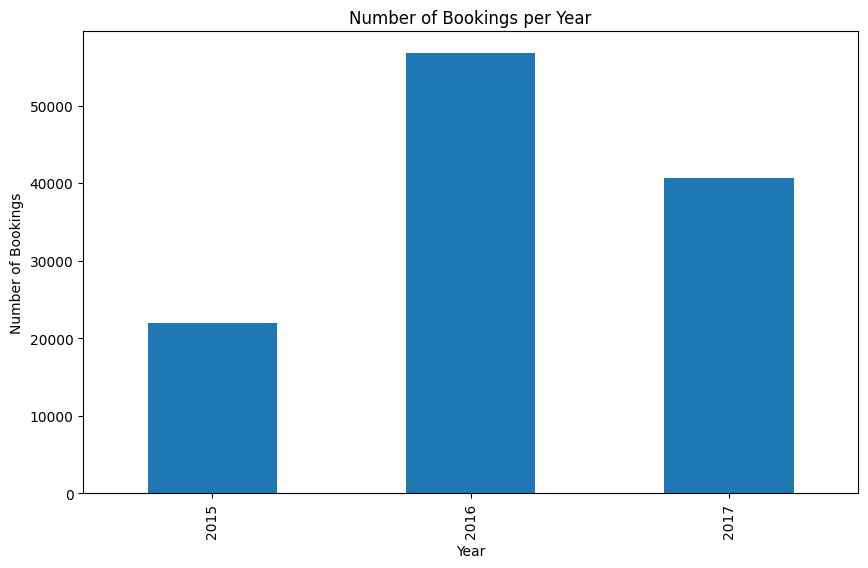

In [ ]:
# Group by year and count the number of bookings
yearly_bookings = data['arrival_date_year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
yearly_bookings.plot(kind='bar')
plt.title('Number of Bookings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()

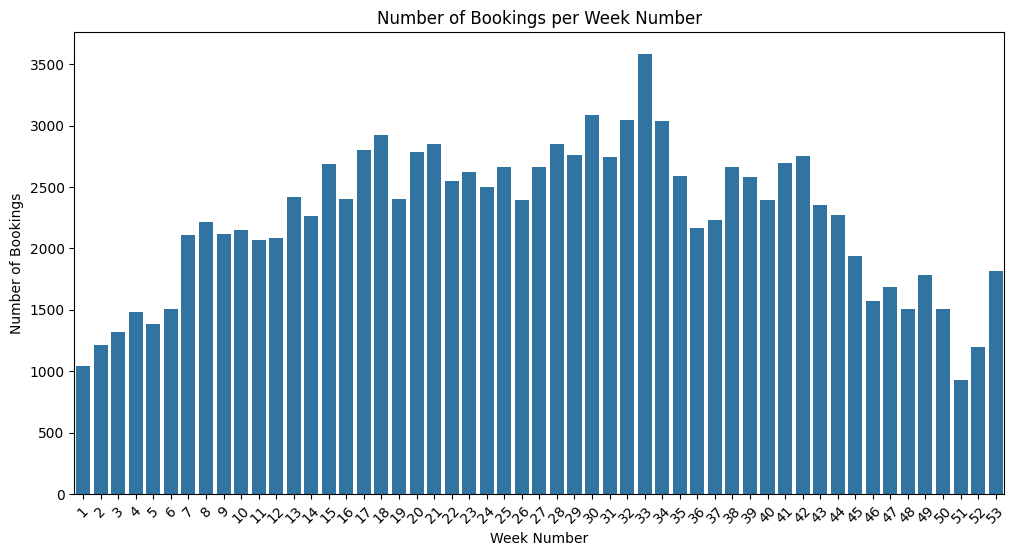

In [ ]:
# Plot the relationship between week number and number of bookings
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='arrival_date_week_number')
plt.title('Number of Bookings per Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# **Optimal Length of Stay**

Objective: Analyze how the length of stay affects the average daily rate (ADR).

**Steps:**

Calculate Total Stay Length:

Add the number of weekend and week nights to get the total length of stay.
Visualize ADR vs. Stay Length:

Create a scatter plot to see how ADR varies with the length of stay.

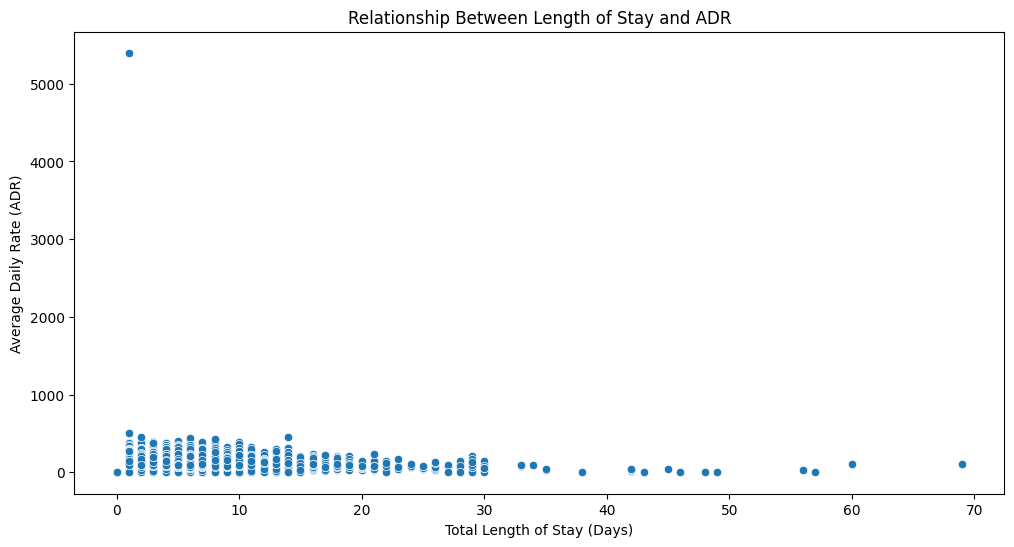

In [ ]:
# Calculate total length of stay
data['total_stay_length'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Plot the relationship between stay length and ADR
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='total_stay_length', y='adr')
plt.title('Relationship Between Length of Stay and ADR')
plt.xlabel('Total Length of Stay (Days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


# **Correlation Analysis**

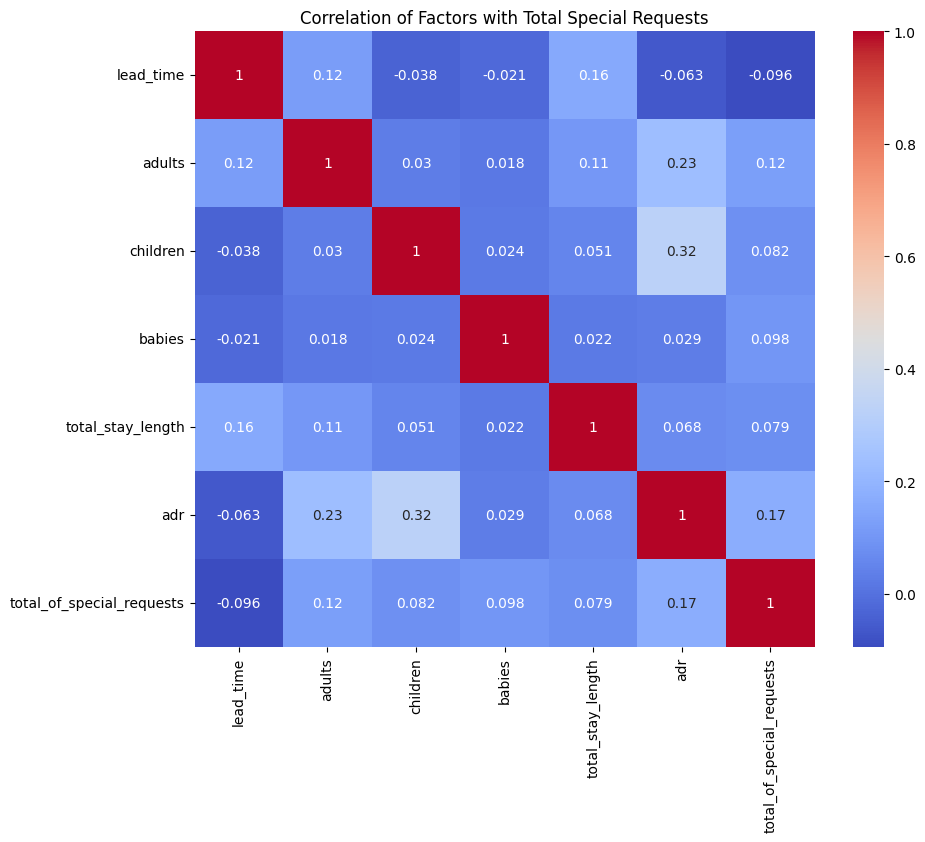

In [ ]:
# Calculate correlation matrix for relevant columns
correlation_matrix = data[['lead_time', 'adults', 'children', 'babies', 'total_stay_length', 'adr', 'total_of_special_requests']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Factors with Total Special Requests')
plt.show()

**Best Time to Book**

**Objective:** Determine the best time of year to book a hotel room.

**Steps:**

Aggregate Bookings by Month and Year:

Analyze the number of bookings per month and year to identify peak and off-peak times.
Visualize Booking Trends:

Create plots to visualize bookings across months and years.

<ipython-input-36-363d9319ad8b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = data.groupby('arrival_date_month').size()


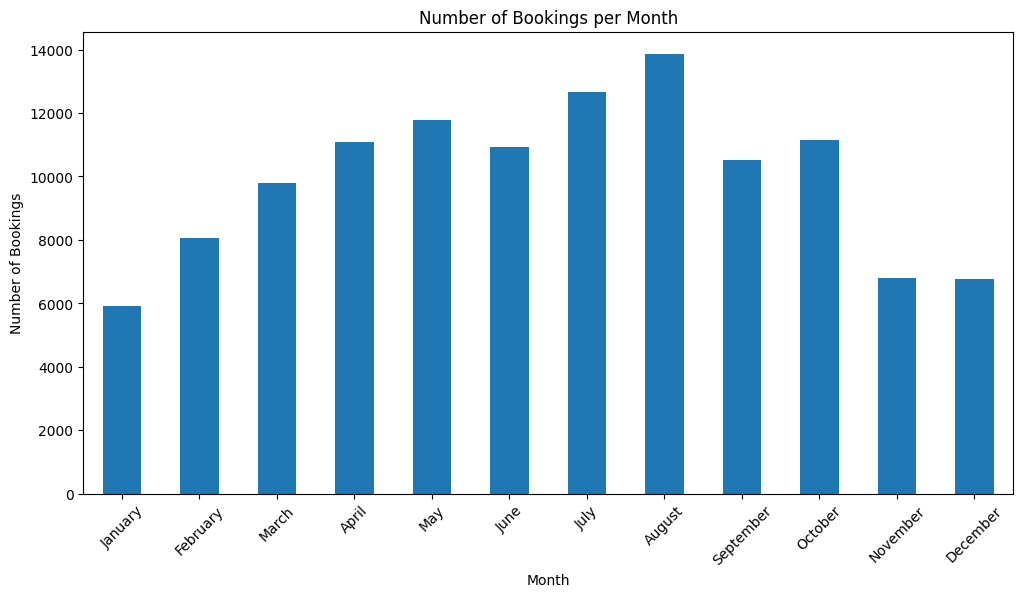

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert arrival_date_month to a categorical type with proper ordering
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Group by month and count bookings
monthly_bookings = data.groupby('arrival_date_month').size()

# Plot monthly bookings
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# **Insights and Recommendations**

# **Key Insights**

**High Cancellation Rates:**

Insight: About 37% of bookings are canceled. Cancellations are positively correlated with longer lead times and higher daily rates (adr).

Implication: This could affect revenue predictions and operational planning, leading to overstaffing or underutilization.

**Lead Time Impact:**

Insight: Bookings with longer lead times are more likely to be canceled. Guests who book far in advance may have less certainty about their plans.

Implication: This creates uncertainty in forecasting occupancy rates and could lead to revenue losses.

**Price Sensitivity:**

Insight: Higher adr is associated with a greater chance of cancellation, suggesting that guests may cancel to rebook at lower rates or switch to more affordable options.

Implication: This affects the stability of high-revenue bookings and suggests a need for dynamic pricing adjustments.

**Low Special Requests and Parking:**

Insight: Most guests make few special requests and do not require car parking. This indicates that the majority of guests have standard needs, with few requiring customized services.

Implication: Service operations can be streamlined as only a small segment demands additional attention.

## **Recommendations**

**Implement Stricter Cancellation Policies:**

Introduce stricter cancellation policies, especially for bookings made far in advance or at high rates. Consider non-refundable rates or require a larger deposit for high-risk bookings.

**Dynamic Pricing Strategies:**

Use dynamic pricing to adjust rates based on booking lead time and demand. Offering discounts for non-refundable bookings or last-minute deals can reduce cancellations and increase occupancy rates.

**Targeted Marketing Campaigns:**

Use insights from lead time and cancellation trends to target specific customer segments with personalized offers. For example, offer incentives to customers with high lead times to confirm their bookings sooner.

**Enhance Guest Retention Programs:**

Implement loyalty programs to encourage repeat bookings and reduce cancellations. Offer exclusive benefits for loyal customers, like flexible cancellation policies or room upgrades.

**Operational Adjustments:**

Since special requests are limited, standardizing service protocols can improve efficiency. Focus resources on peak times and high-demand areas rather than customizing for a broad audience.

**Monitor Booking Patterns:**

Continuously monitor booking patterns to adjust strategies. Use machine learning models to predict cancellations and optimize overbooking strategies to mitigate potential revenue loss.

## **Conclusion**

The analysis of the hotel booking data reveals several critical factors that significantly impact booking behavior, cancellations, and operational efficiency. Key findings include a high rate of cancellations driven by long lead times and high daily rates, indicating a potential loss in revenue and planning inefficiencies. The insights suggest that targeted actions, such as implementing stricter cancellation policies, dynamic pricing, and enhanced guest retention programs, can mitigate these challenges.

### **Summary of Key Points:**

High Cancellation Rates: Approximately 37% of bookings are canceled, often due to long lead times and high daily rates.

Lead Time and Price Sensitivity: Bookings made far in advance or at higher rates are more prone to cancellations, suggesting a need for pricing and policy adjustments.

Operational Insights: Limited special requests and parking needs indicate that most guests have standard service expectations, allowing for streamlined operations.

**Actionable Recommendations:**

Implement Stricter Cancellation Policies: Target long lead-time and high-rate bookings with non-refundable options or larger deposits.
Dynamic Pricing: Adjust rates based on booking patterns to optimize revenue and reduce cancellations.
Guest Retention Programs: Enhance loyalty schemes to reduce cancellations and encourage repeat bookings.